In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import process_data as proc

# Load training dataset
mailout_train = pd.read_csv('data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';', dtype={'CAMEO_DEUG_2015': str, 'CAMEO_INTL_2015':str}, index_col='LNR')
df_clustered = pd.read_csv('clustered_df.csv', index_col='LNR')

In [3]:
# without "clusters" and plus 'RESPONSE'
cols = np.intersect1d(df_clustered.columns, mailout_train.columns)
cols = np.append(cols,'RESPONSE')

In [4]:
# Prepare data
X_new = mailout_train[cols]

In [5]:
# Cleaning Data
clean_X = proc.drop_na_rows(df=X_new, na_perct=0.7)
clean_X = clean_X.reset_index()
enc_X, cols_with_missing = proc.encode_nans(clean_X, thresh=0)
imputed_X = proc.impute_values(enc_X, cols_with_missing)
imputed_X['OST_WEST_KZ'] = pd.get_dummies(imputed_X['OST_WEST_KZ'], prefix='OST_WEST_KZ', drop_first=True)


In [6]:
len(df_clustered.columns)
#len(enc_X.columns)
len(imputed_X.columns)
#len(np.intersect1d(imputed_X.columns, df_clustered.columns))
#
np.setdiff1d(df_clustered.columns, imputed_X.columns)

array(['cluster'], dtype=object)

In [7]:
X = imputed_X.loc[:,np.intersect1d(df_clustered.columns, imputed_X.columns)]

In [8]:
X = X[df_clustered.columns.values[:-1]]

df_clustered = df_clustered.drop(columns='cluster')

In [9]:
df_clustered.head()

,AGER_TYP,AKT_DAT_KL,ALTERSKATEGORIE_FEIN_was_missing,ALTERSKATEGORIE_GROB,ALTER_HH,ANREDE_KZ,ANZ_HAUSHALTE_AKTIV,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,...,HH_DELTA_FLAG,W_KEIT_KIND_HH,D19_KONSUMTYP,D19_LOTTO,D19_GESAMT_ONLINE_QUOTE_12,D19_VERSAND_ONLINE_QUOTE_12,D19_SOZIALES,ALTERSKATEGORIE_FEIN,KK_KUNDENTYP,EXTSEL992
LNR,,,,,,,,,,,,,,,,,,,,,
910220,-1,9,0,1,0,2,11,0,2,12,...,0,3,9,0,0,0,0,21,3,56
910225,-1,9,0,3,17,2,10,0,1,7,...,0,3,9,0,0,0,0,17,3,14
910226,2,1,0,4,13,2,1,0,0,2,...,0,6,9,0,0,0,0,13,3,31
910241,-1,1,0,3,20,1,3,0,4,3,...,0,2,1,0,10,10,0,14,1,56
910244,3,1,0,1,10,2,5,0,1,2,...,0,6,4,0,10,0,4,10,3,20


In [10]:
X.head()

,AGER_TYP,AKT_DAT_KL,ALTERSKATEGORIE_FEIN_was_missing,ALTERSKATEGORIE_GROB,ALTER_HH,ANREDE_KZ,ANZ_HAUSHALTE_AKTIV,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,...,HH_DELTA_FLAG,W_KEIT_KIND_HH,D19_KONSUMTYP,D19_LOTTO,D19_GESAMT_ONLINE_QUOTE_12,D19_VERSAND_ONLINE_QUOTE_12,D19_SOZIALES,ALTERSKATEGORIE_FEIN,KK_KUNDENTYP,EXTSEL992
0,2,1.0,False,4,8.0,2,15.0,0.0,1.0,13.0,...,0.0,6.0,3.0,0.0,0.0,0.0,1.0,8.0,3.0,47.0
1,1,4.0,False,3,13.0,2,1.0,0.0,2.0,1.0,...,0.0,4.0,1.0,0.0,0.0,0.0,5.0,13.0,2.0,56.0
2,1,1.0,False,4,9.0,1,0.0,0.0,0.0,1.0,...,0.0,6.0,2.0,0.0,0.0,0.0,2.0,7.0,3.0,36.0
3,2,1.0,False,4,6.0,2,4.0,0.0,2.0,4.0,...,0.0,6.0,3.0,7.0,0.0,0.0,1.0,6.0,3.0,41.0
4,2,1.0,False,3,9.0,1,53.0,0.0,1.0,44.0,...,0.0,6.0,2.0,0.0,0.0,0.0,1.0,9.0,3.0,55.0


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Columns: 335 entries, AGER_TYP to EXTSEL992
dtypes: bool(8), float64(253), int64(73), uint8(1)
memory usage: 87.4 MB


In [12]:
# Clustering

# Index dataframe with LNR id
X = X.astype(np.int8)

# KMeans Clustering
kmeans = KMeans(n_clusters=6, random_state=42, max_iter=700)

#print("Clustering ... \n")
kmeans.fit(df_clustered)
clusters = kmeans.predict(X)
X['cluster'] = clusters

# Store DataFrame
print("Storing clustered data...")
X.to_csv('X_class.csv', header=X.columns)

Storing clustered data...


In [13]:
#X['cluster'] = clusters
#y = X['RESPONSE']
X = X.set_index(clean_X['LNR'])
y = mailout_train.loc[X.index, 'RESPONSE']

In [14]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Preprocessing
scaler_train = RobustScaler().fit(X_train)
#scaler_train = StandardScaler().fit(X_train)
#scaler_train = MinMaxScaler().fit(X_train)
X_train = scaler_train.transform(X_train)

scaler_test = RobustScaler().fit(X_test)
#scaler_test = StandardScaler().fit(X_test)
#scaler_test = MinMaxScaler().fit(X_test)
X_test = scaler_train.transform(X_test)

In [16]:
from xgboost import XGBClassifier

#xgb = XGBClassifier(n_estimators=200, learning_rate=0.5, reg_alpha=0.5, max_depth=3,objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
#xgb.fit(X_train, y_train)

xgb = XGBClassifier(n_estimators=200, learning_rate=0.5, reg_alpha=0.5, max_depth=3,objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0.5, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [17]:
y_pred = xgb.predict(X_train)
target_names = ['class 0', 'class 1']
print(classification_report(y_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     27651
     class 1       1.00      1.00      1.00       349

    accuracy                           1.00     28000
   macro avg       1.00      1.00      1.00     28000
weighted avg       1.00      1.00      1.00     28000



In [18]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99      6914
     class 1       0.00      0.00      0.00        86

    accuracy                           0.99      7000
   macro avg       0.49      0.50      0.50      7000
weighted avg       0.98      0.99      0.98      7000



Xgb: f1=0.000 auc=0.028


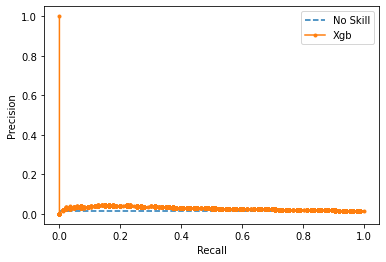

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot


# predict probabilities
y_probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]

# predict class values
y_pred = xgb.predict(X_test)

xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, y_probs)
xgb_f1, xgb_auc = f1_score(y_test, y_pred), auc(xgb_recall, xgb_precision)
# summarize scores

print('Xgb: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(xgb_recall, xgb_precision, marker='.', label='Xgb')
# axis labels
pyplot.xlabel('Recall');
pyplot.ylabel('Precision');
# show the legend
pyplot.legend();
# show the plot

No Skill: ROC AUC=0.500
XGB: ROC AUC=0.721


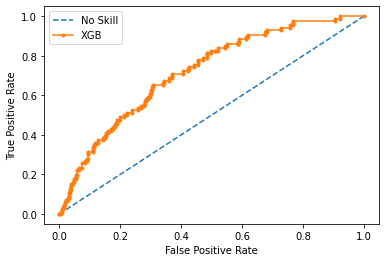

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

# predict probabilities
y_probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xgb_auc = roc_auc_score(y_test, y_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend();

In [21]:
# Ref: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

No Skill: ROC AUC=0.500
XGB: ROC AUC=0.721
SVM: ROC AUC=0.604


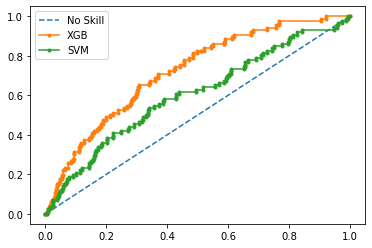

In [22]:
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='poly', class_weight='balanced', random_state=42, C=3, probability=True).fit(X_train, y_train)

y_probs2 = svm.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_probs2 = y_probs2[:, 1]
# calculate scores
svm_auc = roc_auc_score(y_test, y_probs2)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))

# calculate roc curves
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_probs2)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')

# axis labels

pyplot.legend();

pyplot.savefig("ROC_Curve")

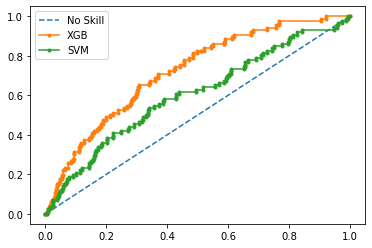

In [23]:
# calculate roc curves
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_probs2)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')

# axis labels

pyplot.legend();

pyplot.savefig("ROC_Curve")

In [26]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear')

In [27]:
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear')

No Skill: ROC AUC=0.500
XGB: ROC AUC=0.721
SVM: ROC AUC=0.604
Logreg: ROC AUC=0.660


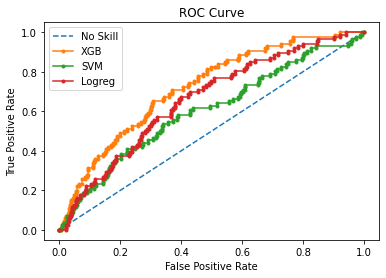

In [32]:
y_probs3 = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_probs3 = y_probs3[:, 1]
# calculate scores
logreg_auc = roc_auc_score(y_test, y_probs3)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('Logreg: ROC AUC=%.3f' % (logreg_auc))

# calculate roc curves
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, y_probs3)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(logreg_fpr, logreg_tpr, marker='.', label='Logreg')

# axis labels

pyplot.legend();
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("ROC Curve");
pyplot.savefig("ROC_Curve");